# Load Dataset

In [1]:
!gdown --id 1nLdjq_y0hJ4_A-kH6MZb9x-GDk4sNrRY

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1nLdjq_y0hJ4_A-kH6MZb9x-GDk4sNrRY
To: /content/adult.csv
100% 4.10M/4.10M [00:00<00:00, 31.6MB/s]


# Feature Engineering

In [2]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
import pandas as pd

# Load and preprocess the data
data = pd.read_csv('/content/adult.csv')
data_clean = data.drop(columns=['income']).replace('?', pd.NA).fillna(data.mode().iloc[0])
label_encoders = {col: LabelEncoder().fit(data_clean[col]) for col in data_clean.select_dtypes(include='object').columns}
data_clean = data_clean.apply(lambda col: label_encoders[col.name].transform(col) if col.name in label_encoders else col)
data_scaled = StandardScaler().fit_transform(data_clean)

# Apply Clustering

In [ ]:
# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
data_clean['KMeans_Cluster'] = kmeans.fit_predict(data_scaled)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
data_clean['DBSCAN_Cluster'] = dbscan.fit_predict(data_scaled)

# Evaluate
silhouette_kmeans = silhouette_score(data_scaled, data_clean['KMeans_Cluster'])
silhouette_dbscan = silhouette_score(data_scaled, data_clean['DBSCAN_Cluster'])
dbi_kmeans = davies_bouldin_score(data_scaled, data_clean['KMeans_Cluster'])
dbi_dbscan = davies_bouldin_score(data_scaled, data_clean['DBSCAN_Cluster'])

print(f"Silhouette Score (K-Means): {silhouette_kmeans}")
print(f"Silhouette Score (DBSCAN): {silhouette_dbscan}")
print(f"Davies-Bouldin Index (K-Means): {dbi_kmeans}")
print(f"Davies-Bouldin Index (DBSCAN): {dbi_dbscan}")


Silhouette Score (K-Means): 0.14189076005458784
Silhouette Score (DBSCAN): -0.4322417829200756
Davies-Bouldin Index (K-Means): 1.8333345701515462
Davies-Bouldin Index (DBSCAN): 1.5398579579935545


# Visualization with PCA

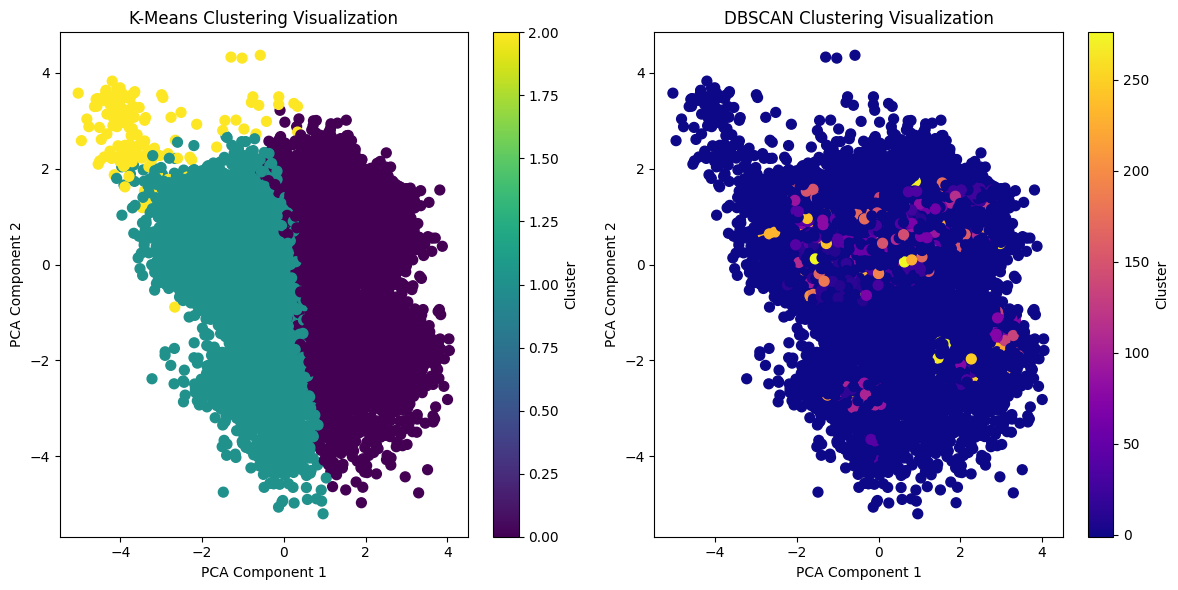

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

# Apply PCA to reduce the dimensions to 2 for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_scaled)

# Plot K-Means Clusters
plt.figure(figsize=(12, 6))

# K-Means Clustering Results
plt.subplot(1, 2, 1)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=data_clean['KMeans_Cluster'], cmap='viridis', s=50)
plt.title('K-Means Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')

# DBSCAN Clustering Results
plt.subplot(1, 2, 2)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=data_clean['DBSCAN_Cluster'], cmap='plasma', s=50)
plt.title('DBSCAN Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')

# Show plot
plt.tight_layout()
plt.show()


# Visualization using t-SNE

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


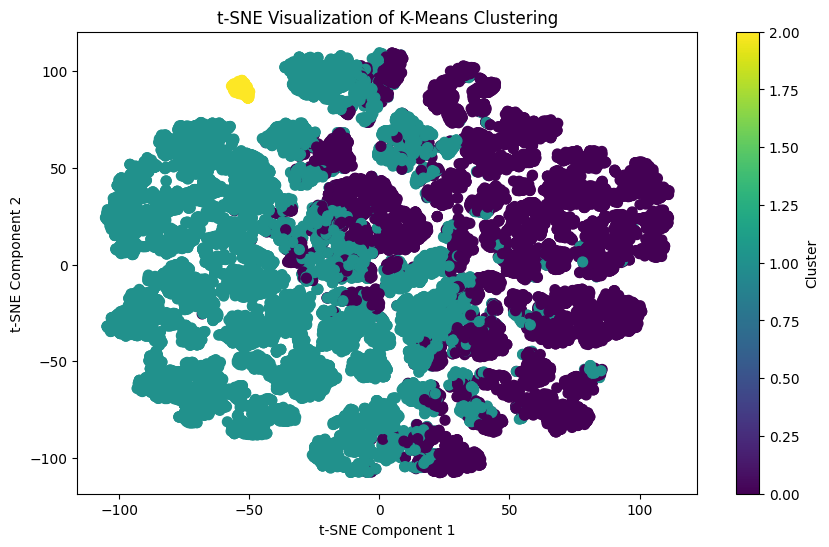

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Apply t-SNE to reduce dimensions to 2 for visualization
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
tsne_data = tsne.fit_transform(data_scaled)

# Visualize t-SNE with K-Means clusters
plt.figure(figsize=(10, 6))

# Scatter plot for t-SNE result with K-Means clusters
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=data_clean['KMeans_Cluster'], cmap='viridis', s=50)
plt.title('t-SNE Visualization of K-Means Clustering')y
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')
plt.show()


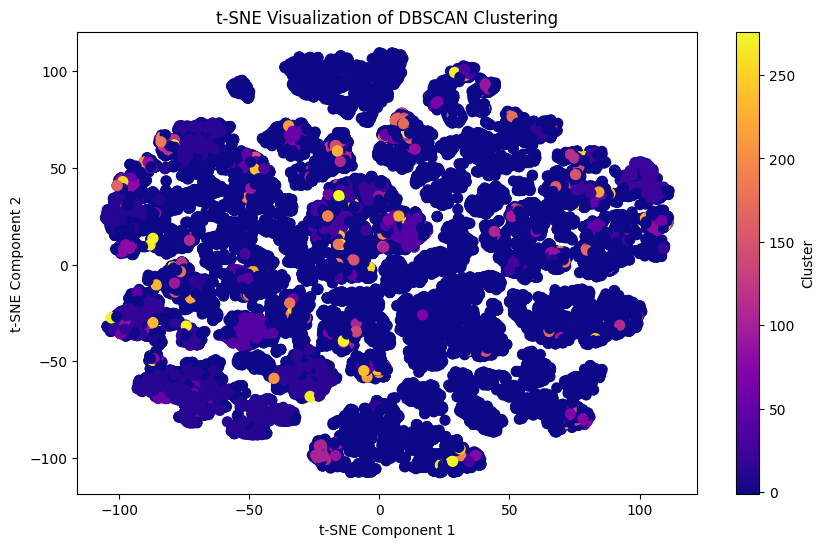

In [ ]:
# Visualize t-SNE with DBSCAN clusters
plt.figure(figsize=(10, 6))

# Scatter plot for t-SNE result with DBSCAN clusters
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=data_clean['DBSCAN_Cluster'], cmap='plasma', s=50)
plt.title('t-SNE Visualization of DBSCAN Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')
plt.show()
